In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np

In [2]:
class Quadrent:
    
    def __init__(self, v1, v2, orientation, level):
        self.v1 = v1
        self.v2 = v2
        self.orientation = orientation % 4
        self.level = level
        self.q1, self.q2, self.q3, self.q4 = None, None, None, None

        if level > 0:
            self.full_split()

            
    def __repr__(self):
        return f'Quadrent({self.v1}, {self.v2}, {self.orientation}, {self.level}): {self.q1}, {self.q2}, {self.q3}, {self.q4})'
        
        
    def center(self):
        return (
            self.v1[0] + (self.v2[0]-self.v1[0])/2,
            self.v1[1] + (self.v2[1]-self.v1[1])/2
        )


    def split(self):
        
        a = self.v1
        b = self.v2
        
        x_diff = (b[0]-a[0])/2
        y_diff = (b[1]-a[1])/2
             
        o = self.orientation + np.roll([1, 0, 0, -1], self.orientation)
        
        index = {
            0:[0, 1, 2, 3],
            1:[0, 3, 2, 1],
            2:[2, 3, 0, 1],
            3:[2, 1, 0, 3],
        }
        
        self.q1, self.q2, self.q3, self.q4 = (np.array([
            Quadrent((a[0] + x_diff, a[1] + y_diff), (b[0],          b[1]),          (o[0]) % 4, self.level-1),
            Quadrent((a[0],          a[1] + y_diff), (a[0] + x_diff, b[1]),          (o[1]) % 4, self.level-1),
            Quadrent((a[0],          a[1]         ), (a[0] + x_diff, a[1] + y_diff), (o[2]) % 4, self.level-1),
            Quadrent((a[0] + x_diff, a[1]         ), (b[0],          a[1] + y_diff), (o[3]) % 4, self.level-1)
        ])[index[self.orientation]])
        
    
    def full_split(self):
        any_split = False
        for p in [self.q1, self.q2, self.q3, self.q4]:
            try:
                p.split()
                any_split = True
            except AttributeError:
                pass
        if not any_split:
            self.split()

    
    def points(self):
        points = []
        for p in [self.q1, self.q2, self.q3, self.q4]:
            try:
                points.extend(p.points())
            except AttributeError:
                pass
        if not points:
            points = [self.center()]
        return points
    
    
    def plot_2d(self):
        
        points = self.points()

        segments = zip(points[:-1], points[1:])

        lc = LineCollection(segments, cmap=plt.get_cmap('gist_rainbow'))

        lc.set_array(np.linspace(0, 1, len(points)))
        lc.set_linewidth(3)

        plt.grid(True)

        plt.gca().add_collection(lc)
        plt.gca().set_aspect('equal', adjustable='box')
        

    def plot_3d(self):

        points = self.points()
        points = [(x, y, 0) for x, y in self.points()]

        segments = zip(points[:-1], points[1:])
        lc = Line3DCollection(list(segments), cmap=plt.get_cmap('gist_rainbow'))

        lc.set_array(np.linspace(0, 1, len(points)))
        lc.set_linewidth(3)

        plt.grid(True)
        
        plt.gca(projection='3d')
        plt.gca().add_collection(lc)
        plt.gca().set_aspect('equal', adjustable='box')


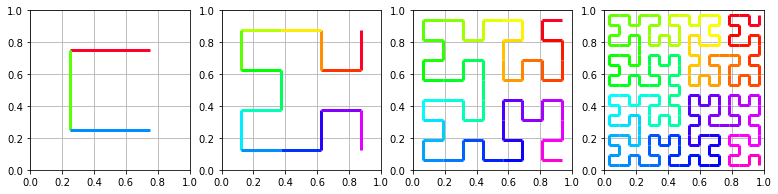

In [3]:
%matplotlib inline

def plots_2d(orientation, n):
    
    plt.figure(figsize=(20, 20))
    plt.subplot(1, n, 1)
    
    
    for x in range(1, n):
        plt.subplot(1, n+1, x+1)
        Quadrent((0, 0), (1, 1), orientation, x).plot_2d()

    plt.show()
    

for x in range(1):
    plots_2d(x, 5)

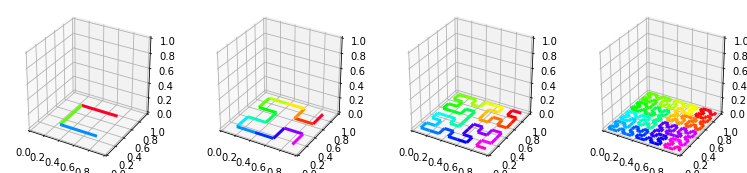

In [4]:
%matplotlib inline

def plots_3d(orientation, n):
    
    plt.figure(figsize=(20, 20))
    plt.subplot(1, n, 1)
    
    
    for x in range(1, n):
        plt.subplot(1, n+1, x+1, projection='3d')
        Quadrent((0, 0), (1, 1), orientation, x).plot_3d()

    plt.show()
    

for x in range(1):
    plots_3d(x, 5)